import the dependencies

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

data collection and analysis


In [10]:
# loading data from csv file to pandas dataframe
customers_data=pd.read_csv('/Mall_Customers.csv')


In [11]:
#first 5 rows in the dataframe
customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#finding the number of rows and columns
customers_data.shape

(200, 5)

In [12]:
# getting some info abt the dataset
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
#checking for missing values
customers_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

choosing the annual income column and spending score column

In [14]:
X=customers_data.iloc[:,[3,4]].values

In [ ]:
print(X)

choosing the number of clusters

wcss-> Within Clusters Sum Of Squares

In [ ]:
# finding wcss value for different no. of clusters
wcss=[] 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

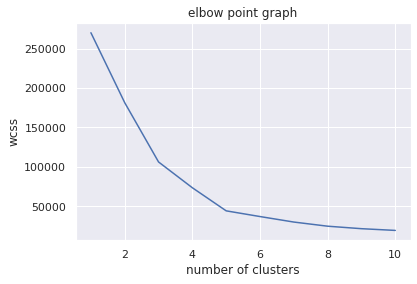

In [17]:
#plot elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

optimum number of clusters = 5

training the k-means clustering model

In [18]:
kmeans = KMeans(n_clusters=5 ,init='k-means++', random_state=0)

#return a label for each datapoint based on thier cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


visualizing all the clusters

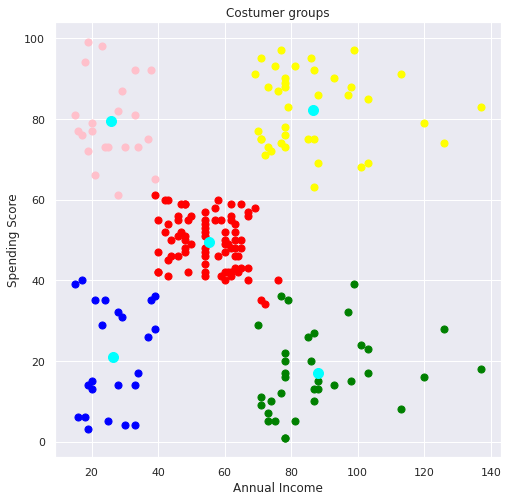

In [21]:
#plotting all the clusters and thier centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='pink',label='cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='cluster 5')

#plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100 , c='cyan', label='centroids')

plt.title('Costumer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
